<a href="https://colab.research.google.com/github/HiruniWijerathna/CropCare-Mini_Project/blob/Nilakshi/beans_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import numpy as np
import pathlib
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import sys

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d prakharrastogi534/bean-leaf-dataset # beans

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset
License(s): CC0-1.0
 95% 163M/172M [00:01<00:00, 108MB/s]
100% 172M/172M [00:01<00:00, 95.8MB/s]


In [ ]:
current_path = '/content'

In [ ]:
zip_ref = zipfile.ZipFile(os.path.join(current_path, 'bean-leaf-dataset.zip'))
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_imgs_path = os.path.join(current_path, 'train', 'train')
test_imgs_path = os.path.join(current_path, 'test', 'test')

In [ ]:
!dir {test_imgs_path}
!dir {train_imgs_path}

angular_leaf_spot  bean_rust  healthy
angular_leaf_spot  bean_rust  healthy


In [ ]:
def class_names_num_imgs_per_class(path):
  data_dir = pathlib.Path(path)
  class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

  num_img_class = dict()
  for class_name in class_names:

    path_to_class = os.path.join(path, class_name)
    class_dir = pathlib.Path(path_to_class)
    num_img_class[class_name] = len([item.name for item in class_dir.glob('*')])

  return num_img_class

In [ ]:
print(class_names_num_imgs_per_class(test_imgs_path))

{'angular_leaf_spot': 43, 'bean_rust': 43, 'healthy': 42}


In [ ]:
class_names_num_imgs = class_names_num_imgs_per_class(train_imgs_path)
print(class_names_num_imgs)
class_names = class_names_num_imgs.keys()

{'angular_leaf_spot': 345, 'bean_rust': 348, 'healthy': 342}


In [26]:
def view_random_images(target_dir, target_class):

    target_folder = os.path.join(target_dir, target_class)

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()

    print(f'image shape : {img.shape}')

['angular_leaf_spot_train.2.jpg']


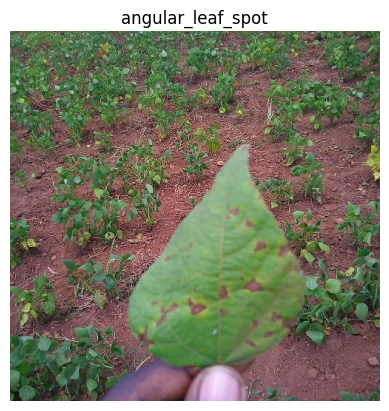

image shape : (500, 500, 3)
['bean_rust_train.142.jpg']


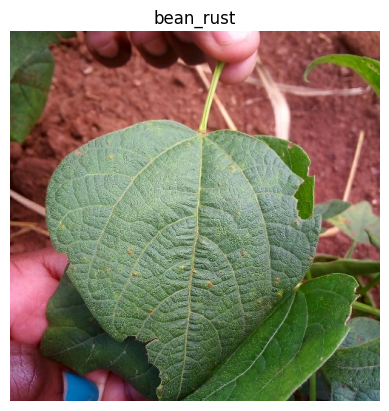

image shape : (500, 500, 3)
['healthy_train.137.jpg']


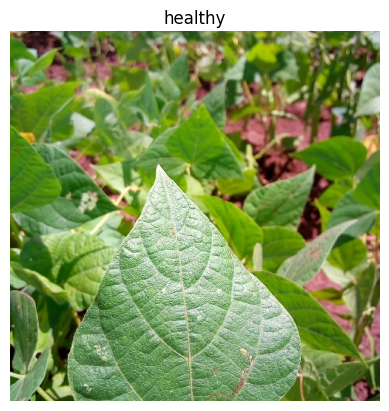

image shape : (500, 500, 3)


In [27]:
for class_name in class_names:
  view_random_images(train_imgs_path, class_name)

In [28]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
        )

train_data_set = train_datagen.flow_from_directory(
        train_imgs_path,
        target_size=(224, 224),
        batch_size=32,
        shuffle=True,
        classes = class_names,
        class_mode='categorical')

test_datagen = ImageDataGenerator(
        rescale = 1./255
        )

test_data_set = train_datagen.flow_from_directory(
        test_imgs_path,
        target_size=(224, 224),
        classes = class_names,
        class_mode='categorical')

Found 1034 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [29]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=5),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
  ])

  model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

  return model

In [30]:
cnn = create_model()

device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
with tf.device(''):
  history = cnn.fit(train_data_set, epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3803 - loss: 1.0824
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5281 - loss: 0.9865
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6452 - loss: 0.8337
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6512 - loss: 0.7777
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6807 - loss: 0.7431
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6920 - loss: 0.6823
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7117 - loss: 0.6482
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7292 - loss: 0.6510
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7324 - loss: 0.6501
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7576 - loss: 0.5906
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7688 - loss: 0.5793
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7655 - lo

In [32]:
model_path = os.path.join(current_path, 'models', 'beans.h5')
cnn.save(model_path)

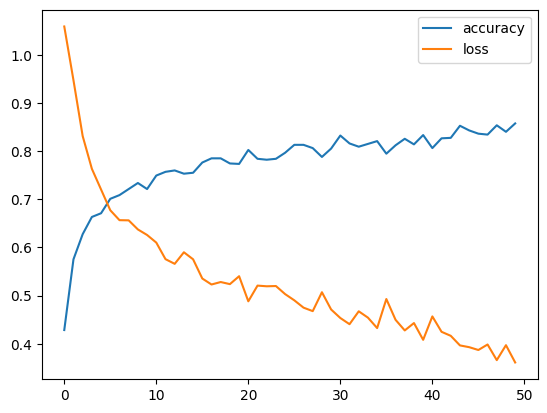

In [33]:
import pandas as pd
pd.DataFrame(history.history).plot();

In [37]:
model = create_model()
model.load_weights(model_path)

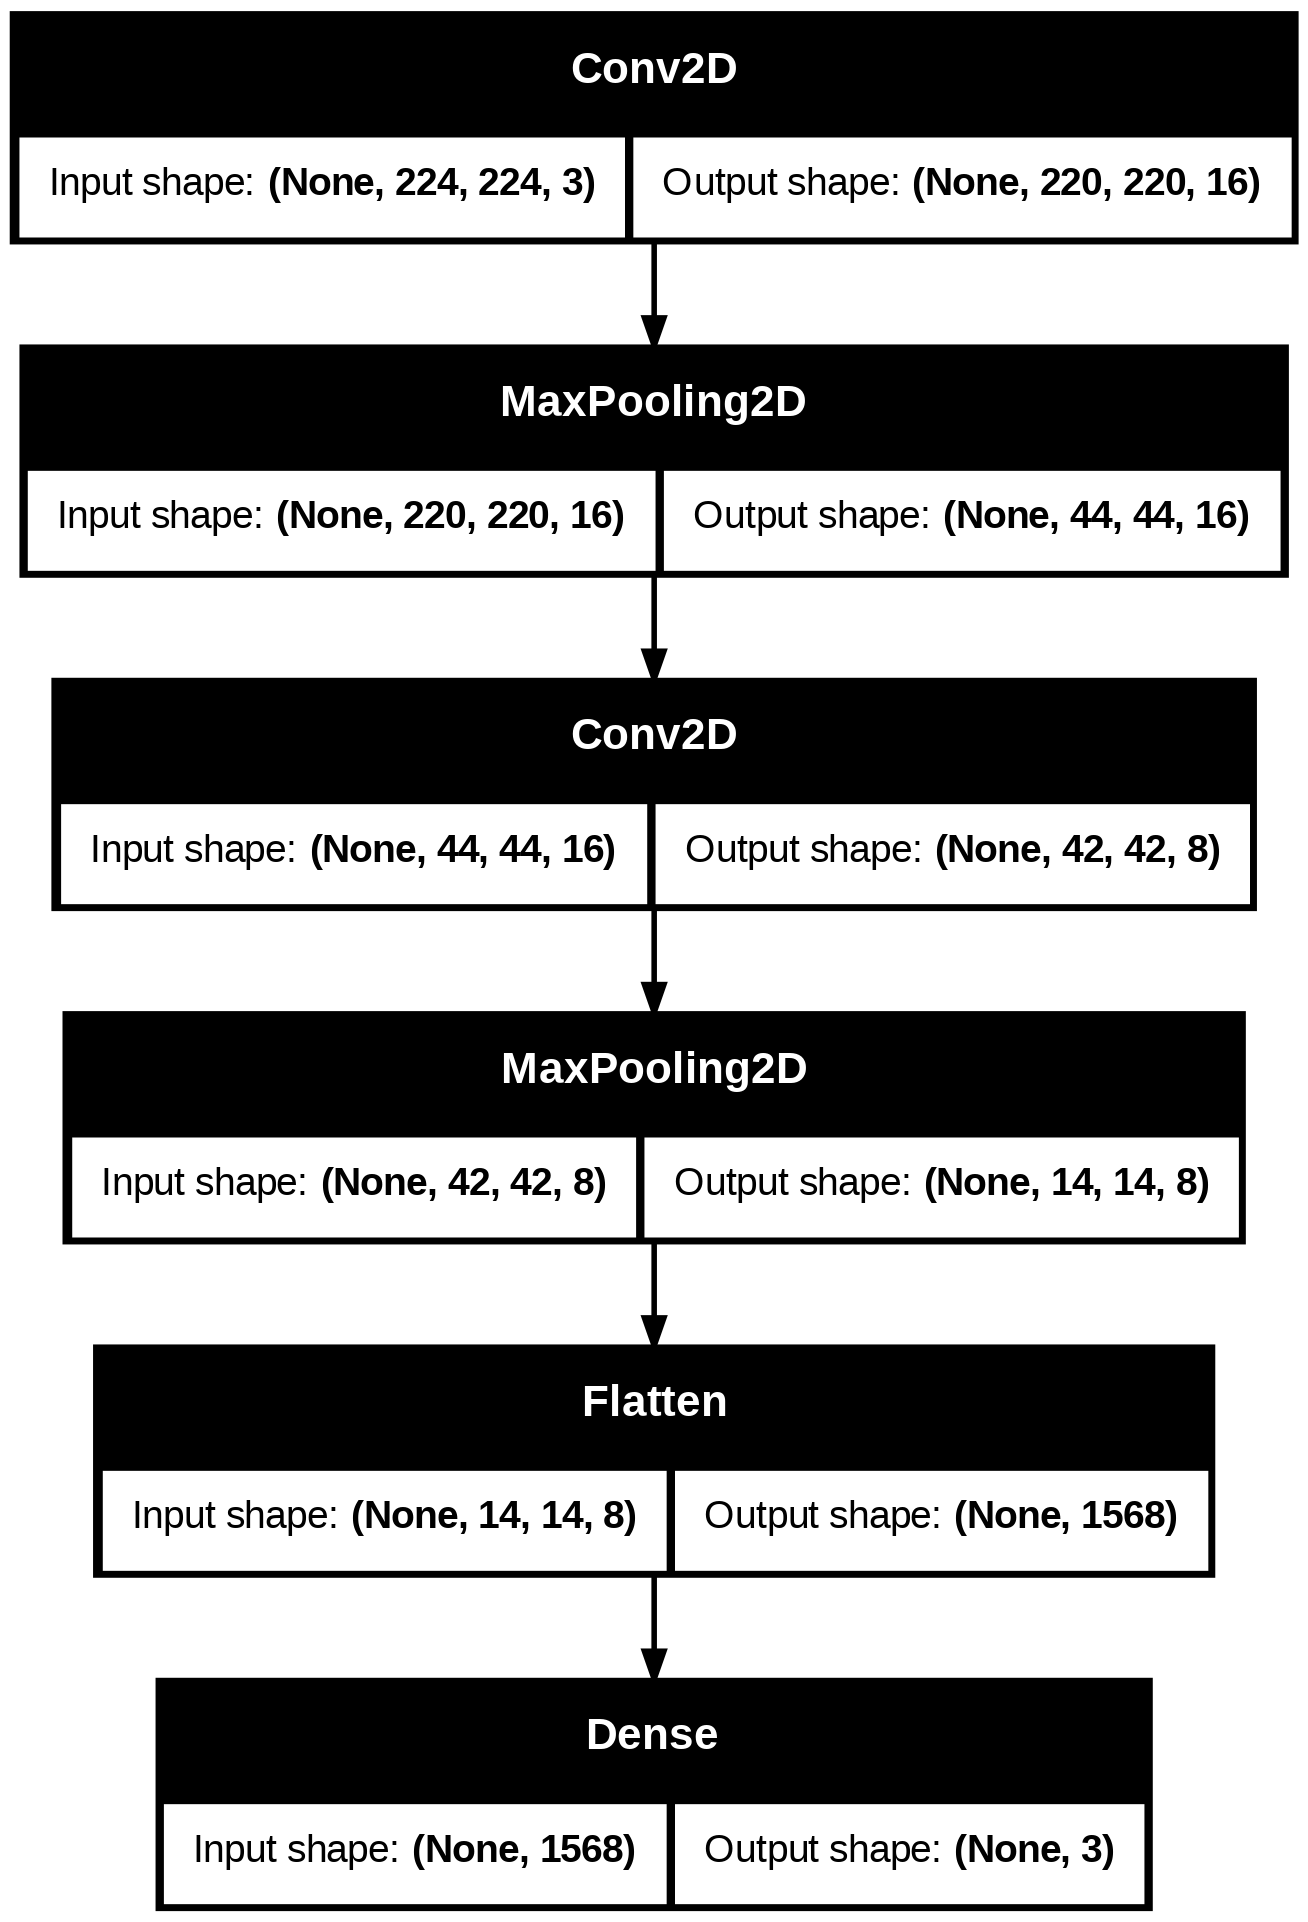

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 44, 44, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 42, 42, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │           4,707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,083 (27.67 KB)

 Trainable params: 7,083 (27.67 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import tensorflow as tf
import numpy as np
import os
import sys

# Assuming model and test_data_set are already defined
img_paths = test_data_set.filenames
num_images = len(img_paths)
predictions = []
prediction_probs = []

for i, img_path in enumerate(img_paths, start=1):
    full_path_to_img = os.path.join(test_imgs_path, img_path)

    # Load the image
    img = tf.keras.utils.load_img(
        full_path_to_img,
        color_mode='rgb',
        target_size=(224, 224),
        interpolation='nearest'
    )

    # Convert image to array and preprocess
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch
    input_arr = input_arr / 255.0  # Normalize to [0, 1] range

    # Predict the class
    prediction = model.predict(input_arr)
    predictions.append(np.argmax(prediction))
    prediction_probs.append(prediction)

    # Display progress
    if i % 100 == 0 or i == num_images:
        pres = (i * 100) / num_images
        sys.stdout.write(f'\r{pres:.2f}% , {i}/{num_images}')
        sys.stdout.flush()

print()  # For newline after progress output

# Calculate test accuracy
true_labels = test_data_set.labels
error_label_count = sum([1 for i in range(len(true_labels)) if true_labels[i] != predictions[i]])
test_accuracy = 100 * (1 - (error_label_count / len(true_labels)))

print(f"Test accuracy: {test_accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

def displayConfusionMatrix(y_true, y_pred, classes=None, text_size=10, figsize = (10, 10)):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Labels',
        ylabel='True Labels',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.0

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
        horizontalalignment='center',
        color='white' if cm[i, j] > threshold else 'black',
        size=text_size)

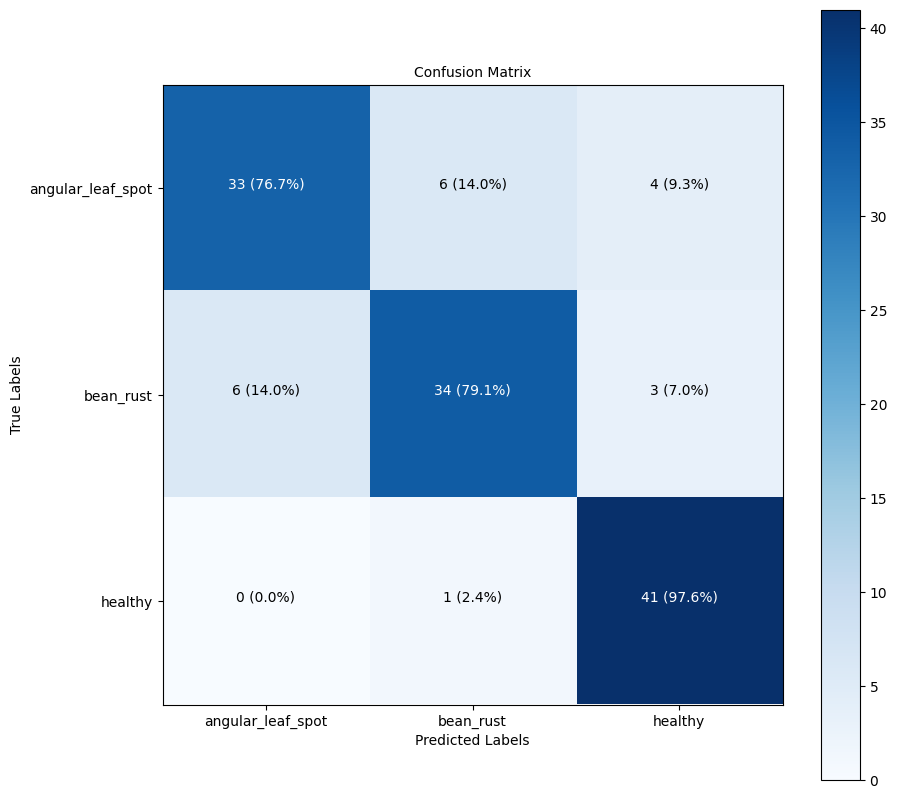

In [44]:
displayConfusionMatrix(test_data_set.labels, predictions, class_names)